# PA3b Sentiment Classification
#### Applied Machine Learning
Grpup 39: Sebastian Kölbel & Min Ze Teh

We begin by importing libraries needed for the task

In [8]:
!pip install seaborn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# for converting training and test datasets into matrices
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB, BernoulliNB

We create a function for preprocessing the csv-files. These preprocessing steps include:
* Making text all lower case
* Removing leading and closing white-space
* Make sure punctuations are separated from words

In [2]:
def read_sentiments(doc_file):
    with open(doc_file, 'r', encoding='utf-8') as f:
        new_lines = []
        for line in f:
            line = line.lower().removesuffix('\n').strip()
            new_lines.append(line.split('\t'))
                
        return pd.DataFrame(new_lines,columns=['sentiment','text'])

We then separate the input values from the output values. The crowdsourced data needed some more preprocessing. There we too many values for the sentiments all consisting of typos. We checked how many errors there were, however there were only 75 errors out of more than 10 000 rows so the errors were dropped to save time.

In [3]:
df = read_sentiments('Data/crowdsourced_train.csv').drop(0)
cs_training = df[df['sentiment'].isin(['positive','negative','neutral'])]
print('Dropped rows in crowdsourced data:',len(df)-len(cs_training))
X_cs_train = cs_training.drop('sentiment', axis=1)
Y_cs_train = cs_training['sentiment']

gold_training = read_sentiments('Data/gold_train.csv').drop(0)
X_gold_train = gold_training.drop('sentiment', axis=1)
Y_gold_train = gold_training['sentiment']


testing = read_sentiments('Data/test.csv').drop(0)
X_test = testing.drop('sentiment', axis=1)
Y_test = testing['sentiment']

Dropped rows in crowdsourced data: 75


In [31]:
from sklearn.metrics import cohen_kappa_score

# compare crowdsourced vs gold labeling
print(Y_cs_train.value_counts(normalize=True))
print(Y_gold_train.value_counts(normalize=True))

print('Cohen kappa score: ', cohen_kappa_score(df['sentiment'], Y_gold_train, labels=['negative','positive','neutral']))


sentiment
neutral     0.473257
positive    0.302990
negative    0.223752
Name: proportion, dtype: float64
sentiment
neutral     0.502435
positive    0.342076
negative    0.155489
Name: proportion, dtype: float64
Cohen kappa score:  0.44643812445708253


In [4]:
def train_document_classifier(X, Y):
    pipeline = make_pipeline(
        # punctuations are removed here, max df should make sure that no too common words are present
        TfidfVectorizer(encoding='utf-8',  
                        max_df=0.05), 
        BernoulliNB())
    pipeline.fit(X, Y)
    return pipeline

In [5]:
def train_document_classifier2(X, Y):
    pipeline = make_pipeline(
        # punctuations are removed here, max df should make sure that no too common words are present
        TfidfVectorizer(encoding='utf-8', max_df=0.05), 
        LogisticRegression())
    pipeline.fit(X, Y)
    return pipeline

In [33]:
clf = train_document_classifier(X_cs_train['text'], Y_cs_train)
gold_t_clf = train_document_classifier2(X_gold_train['text'], Y_gold_train)
#len(clf[0].stop_words_)
#clf[1].
pred_gold = gold_t_clf.predict(X_test['text'])
#accuracy_score(Y_test, clf.predict(X_test['text']))
accuracy_score(Y_test, pred_gold)

0.7119840695148443

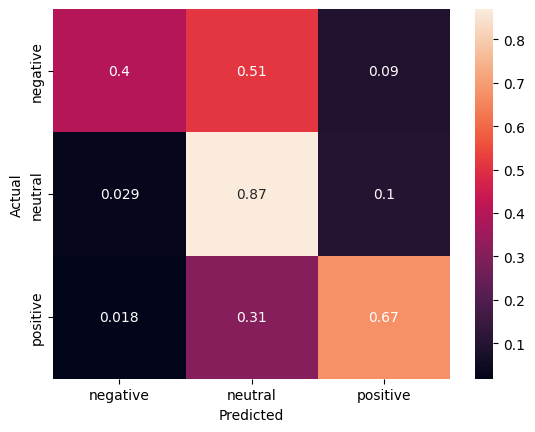

In [63]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, pred_gold, normalize="true")

sns.heatmap(matrix, annot=True, xticklabels=['negative', 'neutral','positive'], yticklabels=['negative', 'neutral','positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()